In [8]:
import pandas as pd
import sympy as smp
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation

import math

import scipy
from scipy import integrate
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
from scipy.optimize import newton

In [9]:
hbar = 1
m = 1

In [10]:
E_min   = 180 * 10 ** -8
E_max   = 1
E_delta = 10 ** -8

L = 10000

h = 0.1
eps = 0.01

In [11]:
a   = 1000
V_0 = 1

def V(x):
    if (np.abs(x - L / 2) <= a):
        return -V_0
    else:
        return 0

In [12]:
def U(x):
    return 2 * m * V(x) / hbar ** 2

def k(E):
    return 2 * m * E / hbar ** 2

In [13]:
def RungeKutta4(f, x, y_0, params):
    """ Fourth-order Runge-Kutta method to solve psi' = f(psi, x) with psi(x[0]) = psi0.

        Integrates function f with inital values psi0 numerically.
        Output is possible multidimensional (in psi) array with len(x).
    """

    n = len(x)
    res = np.zeros(shape = (n, len(y_0)))
    res[0] = y_0

    for i in range(n - 1):
        f_1 = f(x[i],             res[i]                  , params)
        f_2 = f(x[i] + 1 / 2 * h, res[i] + 1 / 2 * h * f_1, params)
        f_3 = f(x[i] + 1 / 2 * h, res[i] + 1 / 2 * h * f_2, params)
        f_4 = f(x[i] +         h, res[i] +         h * f_3, params)

        res[i + 1] = res[i] + h * (1 / 6 * f_1 + 
                                   2 / 6 * f_2 + 
                                   2 / 6 * f_3 + 
                                   1 / 6 * f_4)
        
    return res


def rk4(f, psi0, x, V, E):
    n = len(x)
    psi = np.array([psi0] * n)
    
    for i in range(n - 1):
        h = x[i + 1] - x [i]

        k1 = h * f(psi[i],            x[i],           V[i], E)
        k2 = h * f(psi[i] + 0.5 * k1, x[i] + 0.5 * h, V[i], E)
        k3 = h * f(psi[i] + 0.5 * k2, x[i] + 0.5 * h, V[i], E)
        k4 = h * f(psi[i] +       k3, x[i + 1],       V[i], E)

        psi[i + 1] = psi[i] + (k1 + 2.0 * (k2 + k3) + k4) / 6.0

    return psi


30.0 -9.0
10.5 -9.0
0.75 -9.0
0.75 -4.125
0.75 -1.6875
ET!!
-0.46875 -1.6875
-0.46875 -1.078125
ET!!
-0.7734375 -1.078125
ET!!
-0.92578125 -1.078125
-0.92578125 -1.001953125
ET!!
-0.9638671875 -1.001953125
ET!!
-0.98291015625 -1.001953125
ET!!
-0.992431640625 -1.001953125
ET!!
-0.9971923828125 -1.001953125
ET!!
-0.99957275390625 -1.001953125
-0.99957275390625 -1.000762939453125
-0.99957275390625 -1.0001678466796875
ET!!
-0.9998703002929688 -1.0001678466796875
-0.9998703002929688 -1.0000190734863281
ET!!
-0.9999446868896484 -1.0000190734863281
ET!!
-0.9999818801879883 -1.0000190734863281
-0.9999818801879883 -1.0000004768371582
ET!!
-0.9999911785125732 -1.0000004768371582
ET!!
-0.9999958276748657 -1.0000004768371582
ET!!
-0.999998152256012 -1.0000004768371582
ET!!
-0.9999993145465851 -1.0000004768371582
-0.9999993145465851 -0.9999998956918716
ET!!
-0.9999996051192284 -0.9999998956918716
-0.9999996051192284 -0.99999975040555
-0.9999996051192284 -0.9999996777623892
-0.9999996051192284 -0.9

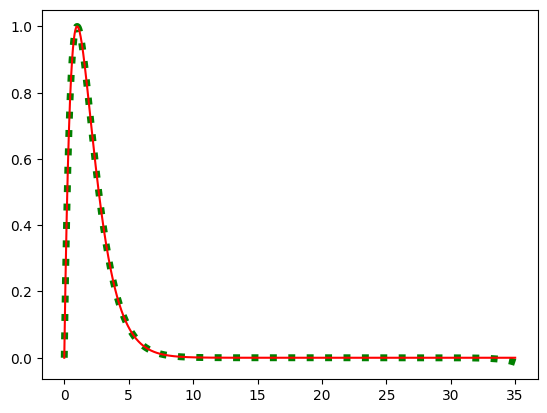

30.0 -9.0
10.5 -9.0
0.75 -9.0
0.75 -4.125
0.75 -1.6875
0.75 -0.46875
0.140625 -0.46875
-0.1640625 -0.46875
-0.1640625 -0.31640625
-0.240234375 -0.31640625
-0.240234375 -0.2783203125
-0.240234375 -0.25927734375
-0.249755859375 -0.25927734375
-0.249755859375 -0.2545166015625
-0.249755859375 -0.25213623046875
-0.249755859375 -0.250946044921875
-0.249755859375 -0.2503509521484375
-0.249755859375 -0.25005340576171875
-0.24990463256835938 -0.25005340576171875
-0.24997901916503906 -0.25005340576171875
-0.24997901916503906 -0.2500162124633789
-0.24999761581420898 -0.2500162124633789
-0.24999761581420898 -0.25000691413879395
-0.24999761581420898 -0.25000226497650146
-0.24999994039535522 -0.25000226497650146
-0.24999994039535522 -0.25000110268592834
-0.24999994039535522 -0.2500005215406418
-0.24999994039535522 -0.2500002309679985
-0.24999994039535522 -0.25000008568167686
-0.24999994039535522 -0.25000001303851604
-0.24999994039535522 -0.24999997671693563
-0.24999994039535522 -0.24999995855614543


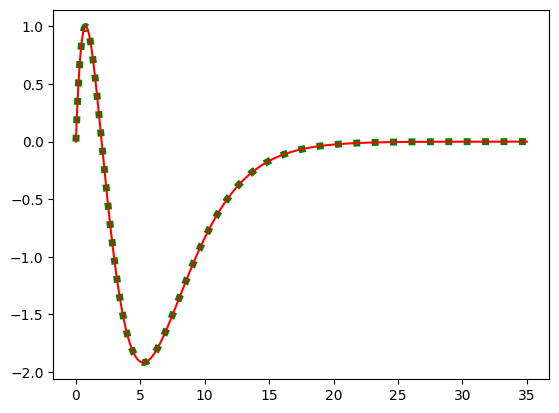

30.0 -9.0
10.5 -9.0
0.75 -9.0
0.75 -4.125
0.75 -1.6875
0.75 -0.46875
0.140625 -0.46875
0.140625 -0.1640625
-0.01171875 -0.1640625
ET!!
-0.087890625 -0.1640625
-0.087890625 -0.1259765625
ET!!
-0.10693359375 -0.1259765625
-0.10693359375 -0.116455078125
-0.10693359375 -0.1116943359375
ET!!
-0.10931396484375 -0.1116943359375
ET!!
-0.110504150390625 -0.1116943359375
-0.110504150390625 -0.1110992431640625
ET!!
-0.11080169677734375 -0.1110992431640625
ET!!
-0.11095046997070312 -0.1110992431640625
ET!!
-0.11102485656738281 -0.1110992431640625
ET!!
-0.11106204986572266 -0.1110992431640625
ET!!
-0.11108064651489258 -0.1110992431640625
-0.11108064651489258 -0.11108994483947754
-0.11108064651489258 -0.11108529567718506
-0.11108064651489258 -0.11108297109603882
ET!!
-0.1110818088054657 -0.11108297109603882
-0.1110818088054657 -0.11108238995075226
ET!!
-0.11108209937810898 -0.11108238995075226
-0.11108209937810898 -0.11108224466443062
ET!!
-0.1110821720212698 -0.11108224466443062
ET!!
-0.11108220834

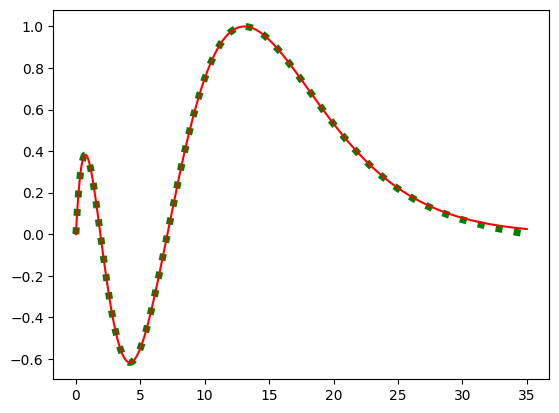

30.0 -9.0
10.5 -9.0
0.75 -9.0
0.75 -4.125
0.75 -1.6875
0.75 -0.46875
0.140625 -0.46875
ET!!
-0.1640625 -0.46875
-0.1640625 -0.31640625
ET!!
-0.240234375 -0.31640625
-0.240234375 -0.2783203125
-0.240234375 -0.25927734375
ET!!
-0.249755859375 -0.25927734375
-0.249755859375 -0.2545166015625
-0.249755859375 -0.25213623046875
-0.249755859375 -0.250946044921875
-0.249755859375 -0.2503509521484375
-0.249755859375 -0.25005340576171875
ET!!
-0.24990463256835938 -0.25005340576171875
ET!!
-0.24997901916503906 -0.25005340576171875
-0.24997901916503906 -0.2500162124633789
ET!!
-0.24999761581420898 -0.2500162124633789
-0.24999761581420898 -0.25000691413879395
-0.24999761581420898 -0.25000226497650146
ET!!
-0.24999994039535522 -0.25000226497650146
-0.24999994039535522 -0.25000110268592834
-0.24999994039535522 -0.2500005215406418
-0.24999994039535522 -0.2500002309679985
-0.24999994039535522 -0.25000008568167686
-0.24999994039535522 -0.25000001303851604
ET!!
-0.24999997671693563 -0.25000001303851604
ET

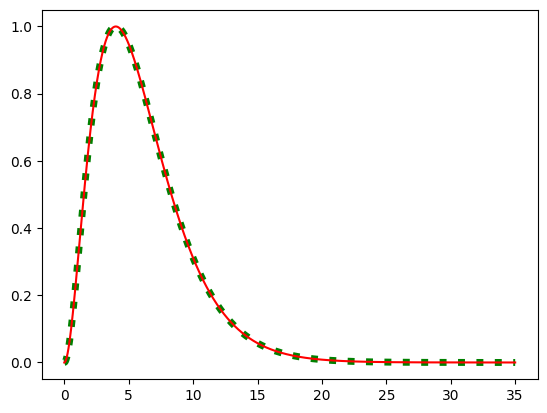

In [2]:
"""
Script for solving the one dimensional Schroedinger equation numerically .
Numerical integration method used is scipy . integrate . odeint .
Counts the nodes of the wave function and determins the harmonic .
Then refines the solution until proper energy is found .
Radial Hydrogen Atom :
V(r) = 2/ r - (L * (L + 1)) / (r ** 2) a.u
"""

# for solving with scipy integrate package
def Schrod_deriv(y, r, L, E):
    """ Odeint calls routine to solve Schroedinger equation of the Hydrogen atom. """

    du2 = y[0] * ((L * (L + 1))/(r ** 2) - 2.0 / r - E)
    return [y[1], du2]

def shoot1(E, psi_init, x, L):
    """ Helper function for optimizing resuts. """
    sol = integrate.odeint(Schrod_deriv, psi_init, x, args = (L, E))
    return sol[len(sol) - 1][0]

def findZeros(rightbound_vals):
    """ Find zero crossing due to sign change in rightbound_vals array.
        Return array with array indices before sign change occurs. 
    """
    return np.where(np.diff(np.signbit(rightbound_vals)))[0]

def normalize(output_wavefunc):
    """ A function to roughly normalize the wave function to 1. """
    normal = max(output_wavefunc)
    return output_wavefunc * (1.0 / normal)

def RefineEnergy(Ebot, Etop, Nodes, psi0, x, L):
    tolerance = 1e-12
    ET = Etop
    EB = Ebot
    psi = [1]
    while (abs(EB - ET) > tolerance or abs(psi[-1]) > 1e-3):
        print(ET, EB)
        initE = (ET + EB) / 2.0

        psi = integrate.odeint(Schrod_deriv, psi0, x, args=(L, initE))[:, 0]

        nodes_ist = len(findZeros(psi)) - 1
        if nodes_ist > Nodes + 1:
            ET = initE
            continue
        if nodes_ist < Nodes - 1:
            EB = initE
            continue

        if (nodes_ist % 2 == 0):
            if ((psi[len(psi) - 1] <= 0.0)):
                ET = initE
                print("ET!!")
            else:
                EB = initE
        elif nodes_ist > 0:
            if ((psi[len(psi) - 1] <= 0.0)):
                EB = initE
            else :
                ET = initE
        elif nodes_ist < 0:
            EB = initE

    return EB, ET


def ShootingHydrogenAtom(psi_init_hydro, N, L, x_arr_hydro):
    """ Shooting method for quantum harmonic oscillator .
        Returns the numerical wave function as array .
    """
    nodes = N - L - 1 # Number of should be nodes
    E_hydro_top = 30.0 # top boundary energy
    E_hydro_bot = -9.0 # bottom boundary energy

    EBref, ETref = RefineEnergy(E_hydro_bot, E_hydro_top, nodes + 1, psi_init_hydro, x_arr_hydro, L)
    Enewton = newton(shoot1, EBref, args = (psi_init_hydro, x_arr_hydro, L))
    
    EBOT = 0
    ETOP = 0

    return EBOT, ETOP, EBref, ETref, Enewton

def HYDRO_ana(x, N, L):
    """ Return analytical solution for Hydrogen SE. """
    
    # analytical solution hydrogen for N =1
    if (((N - L - 1) == 0) and (L == 0)):
        # return 2.0* np . exp ( - x /2)* x
        return x * np.exp(-x)
    
    elif (((N - L - 1) == 1) and (L == 0)):
        return (np.sqrt(2.0) * (- x + 2.0) * np.exp(-x / 2.0) / 4.0) * x
    
    elif (((N - L - 1) == 2)):
        return (2.0 * np.sqrt(3.0) * (2.0 * x ** 2.0 / 9.0 - 2.0 * x + 3.0) * np.exp(-x / 3.0) / 27.0) * x
    
    elif (((N - L - 1) == 0) and (L == 1)):
        return (np.sqrt(6.0) * x * np.exp(-x / 2.0) / 12.0) * x
    
    else:
        print("No analytic wave function found. Please try again.")
        print("Output will be zero array.")
        return np.zeros(len(x))
    

# Quantum numbers
L = 0.0 # angular quantum number
N = 1.0 # principal quantum number


h_ = 1.0 / 200.0
# x_arr_hydro1s = np.arange(0.0001, 20.0 + h_, h_)
x_arr_hydro = np.arange(1e-7, 35.0 + h_, h_)

# Initial conditions as array
psi_init = np.asarray([0.0, 1.0]) # Init cond for hydrogen


nodes = np.arange(1, 4, 1)
for i in nodes:
    EB, ET, Bref, Tref, newtonE = ShootingHydrogenAtom(psi_init, i, 0, x_arr_hydro)
    hydro_ana = HYDRO_ana(x_arr_hydro, i, 0)
    
    psiB = integrate.odeint(Schrod_deriv, psi_init, x_arr_hydro, args = (L, Tref,))[: , 0]
    
    plt.plot(x_arr_hydro, normalize(psiB), 'g:', linewidth = 5, label = 'wavefunction odeint from ebot')
    plt.plot(x_arr_hydro, normalize(hydro_ana), 'r-', label = 'wavefunction analytic')
    plt.show()


EB, ET, Bref, Tref, newtonE = ShootingHydrogenAtom(psi_init, 2, 1, x_arr_hydro)
hydro_ana = HYDRO_ana(x_arr_hydro, 2, 1)
psiB = integrate.odeint(Schrod_deriv, psi_init, x_arr_hydro, args = (1, Tref,))[: , 0]

plt.plot(x_arr_hydro, normalize(psiB), 'g:', linewidth = 5, label = 'wavefunction odeint from ebot')
plt.plot(x_arr_hydro, normalize(hydro_ana), 'r-', label = 'wavefunction analytic')
plt.show()

IPW shooting
QHO shooting
Hydrogen Atom shooting


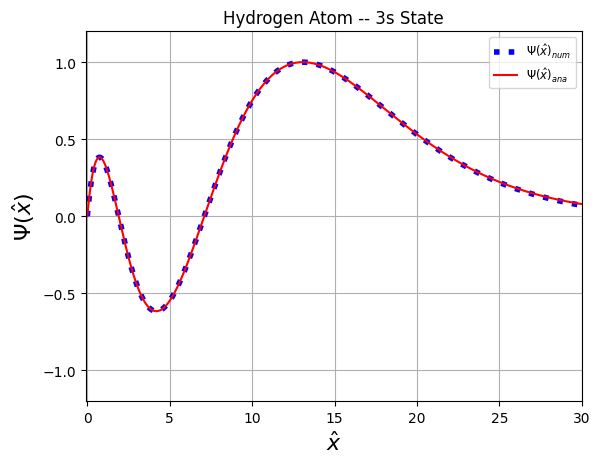

In [9]:
"""
Script for solving the one dimensional Schroedinger equation numerically.

Numerical integration method used is the fourth order Runge Kutta.
Counts the nodes of the wave function and determins the harmonic.
Then refines the solution until proper energy is found.

Potentials:
Infinite Potential Well
V(x_ < 0) = inf , V(x_ = 0, 1) = 0, V(x_ > 1) = inf
Analitic solution:
sin(k * pi * x)

Harmonic Oscillator:
V(x_) = x_ ** 2
Analitic solution:
(1 / (sqrt((2 ** n) * n!) H(x)) * exp(-x ** 2 / 2)

Radial Hydrogen Atom Coulomb attraction:
V(r) = 2 / r - (L * (L + 1)) / (r ** 2)
"""

def Schroed(y, r, V, E):
    """ Return one dim Schroedinger equation with Potential V. """
    psi, phi = y
    dphidx = [phi, (V - E) * psi]

    return np.asarray(dphidx)

def shoot(func, psi0, x, V, E_arr):
    """ Shooting method: find zeroes of function func for energies in E_arr. 
   
        func  : Schroedinger equation to solve.
        psi0  : initial conditions on left side, can be array.
        V     : Potential to solve SE with.
        E_arr : array of energy values : find possible zeroes.
    """
    psi_rightb = []
    
    for i in E_arr:
        psi = rk4(func, psi0, x, V, i)
        psi_rightb.append(psi[-1][0])

    return np.asarray(psi_rightb)

def shoot1(E, func, psi0, x, V):
    """ Helper function for optimizing results. """
    
    psi = rk4(func, psi0, x, V, E)

    return psi[-1][0]

def shoot_ode(E, psi0, x, L):
    """ Helper function for optimizing resuts. """

    psi = integrate.odeint(Schrod_deriv, psi0, x, args = (L, E))
    
    return psi[-1][0]

def findZeros(rightbound_vals):
    """ Find zero crossing due to sign change in rightbound_vals array.
        Return array with array indices before sign change occurs. 
    """
    return np.where(np.diff(np.signbit(rightbound_vals)))[0]

def optimizeEnergy(func, psi0, x, V, E_arr):
    """ Optimize energy value for function using brentq. """
    
    shoot_try = shoot(func, psi0, x, V, E_arr)
    crossings = findZeros(shoot_try)
    energy_list = []

    for cross in crossings :
        energy_list.append(newton(shoot1, E_arr[cross], args = (func, psi0, x, V)))
                                                                          
    return np.asarray(energy_list)


def normalize(output_wavefunc):
    """ A function to roughly normalize the wave function to 1. """
    normal = max(output_wavefunc)
    return output_wavefunc * (1.0 / normal)

def shoot_potwell(psi_init, h_):
    """ Shooting method for infinte potential well.

        500 mesh points.

        Returns the numerical and analitical solution as arrays.
    """

    x_arr_ipw = np.arange(0.0, 1.0 + h_, h_)
    V_ipw = np.zeros(len(x_arr_ipw))
    E_arr = np.arange(1.0, 100.0, 5.0)

    eigE = optimizeEnergy(Schroed, psi_init, x_arr_ipw, V_ipw, E_arr)
                          
    ipw_out_list = []

    for EE in eigE :
        out = rk4(Schroed, psi_init, x_arr_ipw, V_ipw, EE)
        ipw_out_list.append(normalize(out[:, 0]))
    
    out_arr = np.asarray(ipw_out_list)

    # analitical solution for IPW
    k = np.arange(1.0, 4.0, 1.0)
    ipw_sol_ana = []

    for i in k :
        ipw_sol_ana.append(np.sin(i * np.pi * x_arr_ipw))
    
    ipw_sol_ana_arr = np.asarray(ipw_sol_ana)

    return x_arr_ipw, out_arr, ipw_sol_ana_arr


def shoot_QuantumHarmonicOscllator(psi_init, h_):   
    """ Shooting method for quantum harmonic oscllator.

        500 mesh points.

        Returns the numerical and analitycal solution as arrays.
    """

    x_arr_qho = np.arange(-5.0, 5.0 + h_, h_)
    V_qho = x_arr_qho ** 2
    E_arr = np.arange(1.0, 15.0, 1.0)
    eigEn = optimizeEnergy(Schroed, psi_init, x_arr_qho, V_qho, E_arr)
    
    qho_out_list = []
    
    for EN in eigEn :
        out = rk4(Schroed, psi_init, x_arr_qho, V_qho, EN)
        qho_out_list.append(normalize(out[:, 0]))
    
    qho_out_arr = np.asarray(qho_out_list)
    
    # analitical solution for QHO
    qho_sol_ana_0 = np.exp(-(x_arr_qho) ** 2 / 2)
    qho_sol_ana_1 = np.sqrt(2.0) * (x_arr_qho) * np.exp(-(x_arr_qho) ** 2 / 2) * ( - 1)
    qho_sol_ana_2 = (1.0 / np.sqrt(2.0)) * (2.0 * (x_arr_qho) ** 2 - 1.0) * np.exp(-(x_arr_qho) ** 2 / 2)

    qho_sol_list = []
    qho_sol_list.append(qho_sol_ana_0)
    qho_sol_list.append(qho_sol_ana_1)
    qho_sol_list.append(qho_sol_ana_2)

    return x_arr_qho, qho_out_arr, np.asarray(qho_sol_list)

def Schrod_deriv(y, r, L, E):
    """ Odeint calls routine to solve Schrodinger equation of the Hydrogen atom. """
    
    du2 = y[0] * ((L * (L + 1))/(r ** 2) - 2.0 / r - E)
    
    return [y[1], du2]

def shoot_hydrogen(psi_init, h_, L):
    """ Shooting method for Schrodinger equation of the Hydrogen atom.

        Returns the numerical solution as array.
    """

    x_arr_hydro = np.arange(0.0001, 35.0 + h_, h_)
    E_arr = np.arange(-1.0, 0.0, 0.001)
    rightb = []
    
    for EE in E_arr:
        psi = integrate.odeint(Schrod_deriv, psi_init, x_arr_hydro, args = (L, EE))[: , 0]
        rightb.append(psi[-1])

    rightb_arr = np.asarray(rightb)
    crossings = findZeros(rightb_arr)
    
    energy_l = []
    for cross in crossings:
        energy_l.append(newton(shoot_ode, E_arr[cross], args = (psi_init, x_arr_hydro, L)))
    
    psi_out = []
    for En in energy_l:
        psi_out.append(integrate.odeint(Schrod_deriv, psi_init, x_arr_hydro, args = (L, En))[: , 0])
    
    return x_arr_hydro, np.asarray(psi_out)

def HYDRO_ana(x, N, L):
    """ Return analytical solution for Hydrogen SE. """
    
    # analytical solution hydrogen for N =1
    if (((N - L - 1) == 0) and (L == 0)):
        # return 2.0* np . exp ( - x /2)* x
        return x * np.exp(-x)
    
    elif (((N - L - 1) == 1) and (L == 0)):
        return (np.sqrt(2.0) * (- x + 2.0) * np.exp(-x / 2.0) / 4.0) * x
    
    elif (((N - L - 1) == 2)):
        return (2.0 * np.sqrt(3.0) * (2.0 * x ** 2.0 / 9.0 - 2.0 * x + 3.0) * np.exp(-x / 3.0) / 27.0) * x
    
    elif (((N - L - 1) == 0) and (L == 1)):
        return (np.sqrt(6.0) * x * np.exp(-x / 2.0) / 12.0) * x
    
    else:
        print("No analytic wave function found. Please try again.")
        print("Output will be zero array.")
        return np.zeros(len(x))
    
def plot_wavefunction(fig, title_string, x_arr, num_arr, ana_arr, axis_list):
    """ Output plots for wavefunctions. """
    # clear plot
    plt.cla() # clear axis
    plt.clf() # clear figure

    plt.plot(x_arr, num_arr, 'b:', linewidth = 4, label = r"$\Psi(\hat{x})_{num}$")
    plt.plot(x_arr, normalize(ana_arr), 'r-', label = r"$\Psi(\hat{x})_{ana}$")

    plt.ylabel(r"$\Psi(\hat{x})$", fontsize = 16)
    plt.xlabel(r'$\hat{x}$', fontsize = 16)
    plt.legend(loc = 'best', fontsize = 'small')

    plt.axis(axis_list)
    plt.title(title_string)
    plt.grid()

    fig.savefig("plots/wavefunc_" + title_string + ".png")

# Initial conditions for pot.well and harmonic ocs
psi_0 = 0.0
phi_0 = 1.0
psi_init = np.asarray([psi_0, phi_0])

h_ = 1.0 / 200.0 # step size for range arrays

fig = plt.figure()

ipw_x, ipw_num, ipw_ana = shoot_potwell(psi_init, h_)
qho_x, qho_num, qho_ana = shoot_QuantumHarmonicOscllator(psi_init, h_)
hydro_x, hydro_num = shoot_hydrogen(psi_init, h_, 0)
hydro_x2p , hydro_num2p = shoot_hydrogen (psi_init, h_, 1)
hydro_ana1s = HYDRO_ana(hydro_x, 1 , 0)
hydro_ana2s = HYDRO_ana(hydro_x, 2 , 0)
hydro_ana3s = HYDRO_ana(hydro_x, 3 , 0)
hydro_ana2p = HYDRO_ana(hydro_x, 2 , 1)

# IPW shooting
plot_wavefunction(fig, "Infinte Potential Well -- Ground State",         ipw_x, ipw_num[0, :], ipw_ana[0, :], [-0.1, 1.1, -0.2, 1.2])
plot_wavefunction(fig, "Infinte Potential Well -- First Excited State",  ipw_x, ipw_num[1, :], ipw_ana[1, :], [-0.1, 1.1, -1.2, 1.2])
plot_wavefunction(fig, "Infinte Potential Well -- Second Excited State", ipw_x, ipw_num[2, :], ipw_ana[2, :], [-0.1, 1.1, -1.2, 1.2])

# QHO shooting
plot_wavefunction(fig, "Quantum Hamonic Oscillator -- Ground State",         qho_x, qho_num[0, :], qho_ana[0, :], [-5.2, 5.2, -1.2, 1.2])
plot_wavefunction(fig, "Quantum Hamonic Oscillator -- First Excited State",  qho_x, qho_num[1, :], qho_ana[1, :], [-5.2, 5.2, -1.2, 1.2])
plot_wavefunction(fig, "Quantum Hamonic Oscillator -- Second Excited State", qho_x, qho_num[2, :], qho_ana[2, :], [-5.2, 5.2, -1.2, 1.2])

# Hydrogen Atom shooting
plot_wavefunction(fig, "Hydrogen Atom -- 1s State", hydro_x,   normalize(hydro_num[0, :]),   hydro_ana1s, [-0.1, 30.0, -0.1, 1.2])
plot_wavefunction(fig, "Hydrogen Atom -- 2s State", hydro_x,   normalize(hydro_num[1, :]),   hydro_ana2s, [-0.1, 30.0, -2.2, 1.2])
plot_wavefunction(fig, "Hydrogen Atom -- 2p State", hydro_x2p, normalize(hydro_num2p[0, :]), hydro_ana2p, [-0.1, 30.0, -0.1, 1.2])
plot_wavefunction(fig, "Hydrogen Atom -- 3s State", hydro_x,   normalize(hydro_num[2, :]),   hydro_ana3s, [-0.1, 30.0, -1.2, 1.2])

Welcome!
Maximum quantum state is currently limited to the 4 th excited state.


Infinte Potential Well Shooting
900.0 1.0
450.5 1.0
225.75 1.0
ET!!
113.375 1.0
57.1875 1.0
ET!!
29.09375 1.0
ET!!
15.046875 1.0
15.046875 8.0234375
ET!!
11.53515625 8.0234375
11.53515625 9.779296875
ET!!
10.6572265625 9.779296875
ET!!
10.21826171875 9.779296875
ET!!
9.998779296875 9.779296875
ET!!
9.8890380859375 9.779296875
9.8890380859375 9.83416748046875
9.8890380859375 9.861602783203125
ET!!
9.875320434570312 9.861602783203125
9.875320434570312 9.868461608886719
ET!!
9.871891021728516 9.868461608886719
ET!!
9.870176315307617 9.868461608886719
9.870176315307617 9.869318962097168
ET!!
9.869747638702393 9.869318962097168
9.869747638702393 9.86953330039978
ET!!
9.869640469551086 9.86953330039978
9.869640469551086 9.869586884975433
ET!!
9.86961367726326 9.869586884975433
9.86961367726326 9.869600281119347
ET!!
9.869606979191303 9.869600281119347
9.869606979191303 9.869603630155325
ET!!
9.869605304673314 9.

/tmp/ipykernel_5412/2839460835.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  return output_wavefunc * (1.0 / normal)
/tmp/ipykernel_5412/2839460835.py:80: RuntimeWarning: invalid value encountered in multiply
  return output_wavefunc * (1.0 / normal)


ET!!
13.1728515625 12.977734375
ET!!
13.07529296875 12.977734375
ET!!
13.026513671875001 12.977734375
ET!!
13.002124023437501 12.977734375
13.002124023437501 12.98992919921875
13.002124023437501 12.996026611328126
13.002124023437501 12.999075317382815
13.002124023437501 13.000599670410157
ET!!
13.001361846923828 13.000599670410157
13.001361846923828 13.000980758666993
13.001361846923828 13.00117130279541
ET!!
13.001266574859619 13.00117130279541
ET!!
13.001218938827513 13.00117130279541
13.001218938827513 13.001195120811461
13.001218938827513 13.001207029819486
13.001218938827513 13.0012129843235
ET!!
13.001215961575507 13.0012129843235
ET!!
13.001214472949503 13.0012129843235
13.001214472949503 13.0012137286365
ET!!
13.001214100793002 13.0012137286365
ET!!
13.00121391471475 13.0012137286365
13.00121391471475 13.001213821675625
ET!!
13.001213868195187 13.001213821675625
ET!!
13.001213844935407 13.001213821675625
ET!!
13.001213833305517 13.001213821675625
ET!!
13.00121382749057 13.00121

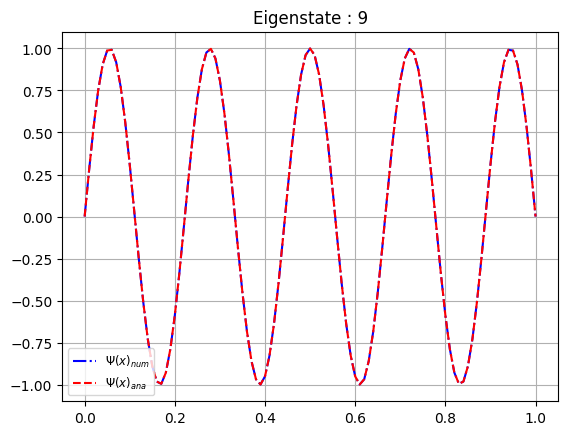

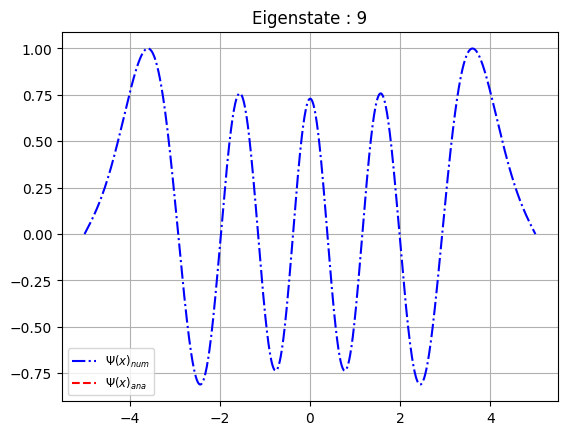

In [20]:
"""
Script for solving the one dimensional Schroedinger equation numerically.

Numerical integration method used is the fourth order Runge Kutta.
Counts the nodes of the wave function and determins the harmonic.
Then refines the solution until proper energy is found.

Potentials:
Infinite Potential Well
V(x_ < 0) = inf , V(x_ = 0, 1) = 0, V(x_ > 1) = inf
Analitic solution:
sin(k * pi * x)

Harmonic Oscillator:
V(x_) = x_ ** 2
Analitic solution:
(1 / (sqrt((2 ** n) * n!) H(x)) * exp(-x ** 2 / 2)

Radial Hydrogen Atom Coulomb attraction:
V(r) = 2 / r - (L * (L + 1)) / (r ** 2)
"""

def Schroed(y, r, V, E):
    """ Return one dim Schroedinger equation with Potential V. """
    psi, phi = y
    dphidx = [phi, (V - E) * psi]

    return np.asarray(dphidx)

def rk4(f, psi0, x, V, E):
    """ Fourth - order Runge - Kutta method to solve phi' = f(psi, x) with psi(x[0]) = psi0.

        Integrates function f with inital values psi0 and potential V numerically.
        Output is possible multidimensional (in psi) array with len(x).
    """

    n = len(x)
    psi = np.array([psi0] * n)
    
    for i in range(n - 1):
        h = x[i + 1] - x [i]

        k1 = h * f(psi[i],            x[i],           V[i], E)
        k2 = h * f(psi[i] + 0.5 * k1, x[i] + 0.5 * h, V[i], E)
        k3 = h * f(psi[i] + 0.5 * k2, x[i] + 0.5 * h, V[i], E)
        k4 = h * f(psi[i] +       k3, x[i + 1],       V[i], E)

        psi[i + 1] = psi[i] + (k1 + 2.0 * (k2 + k3) + k4) / 6.0

    return psi

def findZeros(rightbound_vals):
    """ Find zero crossing due to sign change in rightbound_vals array.
        Return array with array indices before sign change occurs. 
    """
    return np.where(np.diff(np.signbit(rightbound_vals)))[0]

def optimizeEnergy(func, psi0, x, V, E_arr):
    """ Optimize energy value for function using brentq. """
    
    shoot_try = shoot(func, psi0, x, V, E_arr)
    crossings = findZeros(shoot_try)
    energy_list = []

    for cross in crossings :
        energy_list.append(newton(shoot1, E_arr[cross], args = (func, psi0, x, V)))
                                                                          
    return np.asarray(energy_list)


def normalize(output_wavefunc):
    """ A function to roughly normalize the wave function to 1. """
    normal = max(output_wavefunc)
    return output_wavefunc * (1.0 / normal)

def countNodes(wavefunc):
    """ Count nodes of wavefunc by finding Minima and Maxima in wavefunc. """
    maxarray = argrelextrema(wavefunc, np.greater)[0]
    minarray = argrelextrema(wavefunc, np.less)[0]
    
    nodecounter = len(maxarray) + len(minarray)

    return nodecounter

def RefineEnergy(Ebot, Etop, Nodes, psi0, x, V):
    
    tolerance = 1e-12
    ET = Etop
    EB = Ebot
    psi = [1]
    while (abs(EB - ET) > tolerance or abs(psi[-1]) > 1e-3):
        print(ET, EB)

        initE = (ET + EB) / 2.0

        psi = rk4(Schroed, psi0, x, V, initE)[: , 0]

        nodes_ist = len(findZeros(psi)) - 1
        if nodes_ist > Nodes + 1:
            ET = initE
            continue
        if nodes_ist < Nodes - 1:
            EB = initE
            continue

        if (nodes_ist % 2 == 0):
            if ((psi[len(psi) - 1] <= 0.0)):
                ET = initE
                print("ET!!")
            else:
                EB = initE
        elif nodes_ist > 0:
            if ((psi[len(psi) - 1] <= 0.0)):
                EB = initE
            else :
                ET = initE
        elif nodes_ist < 0:
            EB = initE

    return EB, ET

def ShootingInfinitePotentialWell(E_interval, nodes):
    """ Implimentation of Shooting method for Infinite Potential Well
        
        INPUT : E_interval : array with top and bottom value, len(E_inteval) = 2
                nodes : Number wavefunction nodes => determins quantum state.
        OUTPUT : refined energy value numeracal wavefunction as array.
    """
    psi_0 = 0.0
    phi_0 = 1.0
    psi_init = np.asarray([psi_0, phi_0])
    
    h_mesh = 1.0 / 100.0 # step size for range arrays
    x_arr_ipw = np.arange(0.0, 1.0 + h_mesh, h_mesh) # set up mesh
    V_ipw = np.zeros(len(x_arr_ipw)) #set up potential
    
    EBref, ETref = RefineEnergy(E_interval[0], E_interval[1], nodes, psi_init, x_arr_ipw, V_ipw)

    psi = rk4(Schroed, psi_init, x_arr_ipw, V_ipw, EBref)[: , 0]

    return EBref, normalize(psi), x_arr_ipw

def IPW_ana(x, k):
    """ Return analitical wavefunc of respective state (k) of IPW. """
    return np.asarray(np.sin(k * np.pi * x))


def ShootingQuantumHarmonicOscillator(E_interval, nodes):
    """ Shooting QHO. """

    psi_0 = 0.0
    phi_0 = 1.0
    psi_init = np.asarray([psi_0 , phi_0])

    h_mesh = 1.0 / 100.0 # step size for range arrays

    x_arr_qho = np.arange(-5.0, 5.0 + h_mesh, h_mesh) # set up mesh
    V_qho = x_arr_qho **2 # set up potential
    
    EBref, ETref = RefineEnergy(E_interval [0], E_interval[1], nodes, psi_init, x_arr_qho, V_qho)
    
    psiB = rk4(Schroed, psi_init, x_arr_qho, V_qho, EBref)[: , 0]
    psiT = rk4(Schroed, psi_init, x_arr_qho, V_qho, ETref)[: , 0]
    
    return EBref, ETref, normalize(psiB), normalize(psiT), x_arr_qho


def QHO_ana(x, nodes):
    """ Return analitic solution for QHO for up to5 nodes. """
    if (nodes == 1):
        return np.exp(-(x) ** 2 / 2)
    elif (nodes == 2):
        return np.sqrt(2.0) * (x) * np.exp(-(x) ** 2 / 2) * (-1)
    elif (nodes == 3):
        return (1.0 / np.sqrt(2.0)) * (2.0 * (x) ** 2 - 1.0) * np.exp(- (x) ** 2 / 2)
    elif (nodes == 4):
        return (1.0 / np.sqrt(3.0)) * (2.0 * (x) ** 3 - 3.0 * x) * np.exp(-(x) ** 2 / 2)*( -1)
    elif (nodes == 5):
        return (1.0 / np.sqrt(24.0)) * (4.0 * (x) ** 4 - 12.0 * x ** 2 + 3.0) * np.exp(-(x)**2/2)
    else:
        print("No analytic wave function found. Please try again.")
        print("Output will be zero array.")
        return np.zeros(len(x))

# Start
E_qho = [0.1 , 100.0]
E_ipw = [1.0 , 900.0]

nodes_arr = np.arange(1, 10, 1)

print("Welcome!")
print("Maximum quantum state is currently limited to the 4 th excited state.")
print("\n")
print("Infinte Potential Well Shooting")

figipw = plt.figure()

for i in nodes_arr :
    Energy , psi_ipw , x_ipw = ShootingInfinitePotentialWell(E_ipw, i)
    psi_ana = normalize(IPW_ana(i, x_ipw))

    print("Found quantum state at energy = %s [Hartree]" % (Energy))

    plt.cla() # clear axis
    plt.clf() # clear figure

    plt.plot(x_ipw, psi_ipw, 'b-.', label = r'$\Psi(x)_{num}$')
    plt.plot(x_ipw, psi_ana, 'r--', label = r'$\Psi(x)_{ana}$')

    plt.title('Eigenstate : %s' % (i))
    plt.legend(loc = 'best', fontsize = 'small')
    plt.grid()

    figipw.savefig('plots/ipw_shoottest_ state _' + str(i) + '.png')

print("\n")
print("Quantum Harmonic Oscillator Shooting :")

figqho = plt.figure()
for i in nodes_arr :
    EB, ET, psibot, psitop, x_qho = ShootingQuantumHarmonicOscillator(E_qho, i)
    psi_ana = QHO_ana(x_qho, i)

    print("Found quantum state at energy = %s [Hartree]" % (ET))

    plt.cla() # clear axis
    plt.clf() # clear figure

    plt.plot(x_qho, psitop , 'b-.', label = r'$\Psi(x)_{num}$')
    plt.plot(x_qho, normalize(psi_ana), 'r--', label = r'$\Psi(x)_{ana}$')
                
    plt.title('Eigenstate : %s' % (i))
    plt.legend(loc = 'best', fontsize = 'small')
    plt.grid()
    
    figqho.savefig('plots/qho_shootingtest_state_' + str(i) + '.png')

print("\n")
print("Please find plots of wavefunctions in 'plots' - folder.")